<a href="https://colab.research.google.com/github/Dogdriip/KNU-bigdata-idea-contest-2020/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
PATH = '/content/drive/My Drive/빅데이터 융합 아이디어 경진대회/'

In [4]:
df = pd.read_csv(PATH + 'input.csv')

In [5]:
df.head()

,date,quarantined_patient,severe_patient,icu_remain,icu_using
0,2020.12.15.,11025,205,614,205
1,2020.12.16.,11883,226,614,226
2,2020.12.17.,12209,242,614,242
3,2020.12.18.,12888,246,614,246
4,2020.12.19.,13575,275,614,275


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 23 non-null     object
 1   quarantined_patient  23 non-null     int64 
 2   severe_patient       23 non-null     int64 
 3   icu_remain           23 non-null     int64 
 4   icu_using            23 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.0+ KB


In [7]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['quarantined_patient'] = df['quarantined_patient'].astype('float64')
df['severe_patient'] = df['severe_patient'].astype('float64')
df['icu_remain'] = df['icu_remain'].astype('float64')
df['icu_using'] = df['icu_using'].astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 23 non-null     datetime64[ns]
 1   quarantined_patient  23 non-null     float64       
 2   severe_patient       23 non-null     float64       
 3   icu_remain           23 non-null     float64       
 4   icu_using            23 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.0 KB


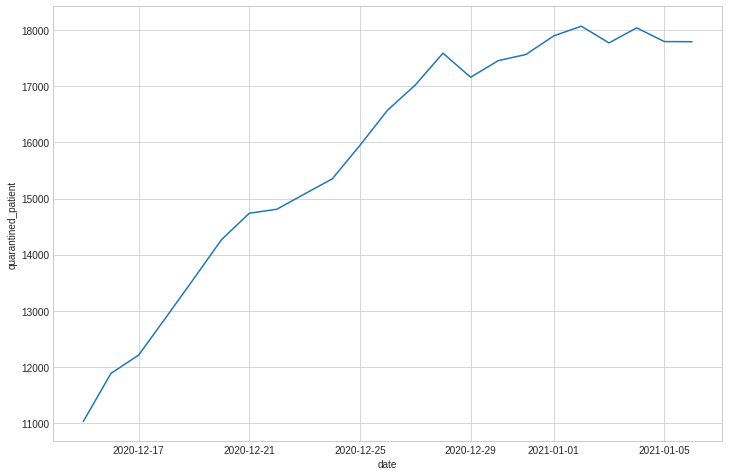

In [9]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='date', y='quarantined_patient')
plt.show()

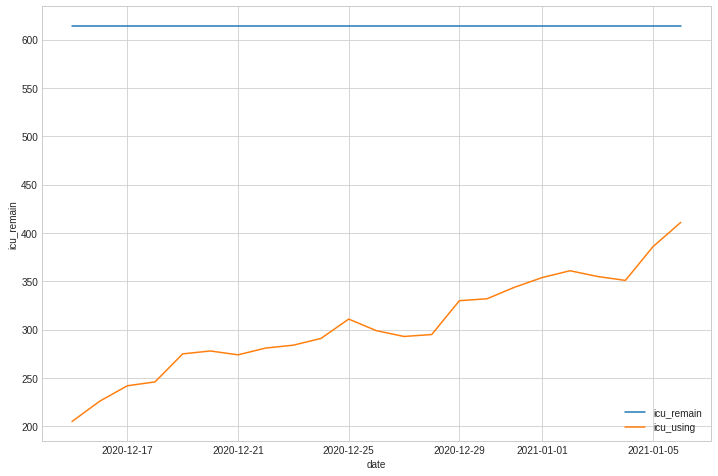

In [10]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='date', y='icu_remain')
sns.lineplot(data=df, x='date', y='icu_using')
plt.legend(labels=['icu_remain', 'icu_using'])
plt.show()

# Prepare data

In [11]:
df.shape

(23, 5)

In [12]:
df = df.drop('date', axis=1)

In [13]:
train = df[:20]
test = df[20:]

# Model

In [14]:
!pip install pycaret

In [15]:
from pycaret.regression import *
clf = setup(data=train, 
            target='icu_using', 
            use_gpu=True
            )

,Description,Value
0,session_id,3772
1,Target,icu_using
2,Original Data,"(20, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13, 3)"


In [16]:
best_3 = compare_models(sort='RMSE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.006
lar,Least Angle Regression,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.006
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.006
br,Bayesian Ridge,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.006
huber,Huber Regressor,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.029
ridge,Ridge Regression,0.0061,0.0001,0.0066,NaN,0.0000,0.0000,0.006
en,Elastic Net,0.0696,0.0138,0.0756,NaN,0.0003,0.0002,0.007
lasso,Lasso Regression,0.0706,0.0142,0.0766,NaN,0.0003,0.0002,0.007
llar,Lasso Least Angle Regression,3.2621,16.3272,3.5131,NaN,0.0122,0.0116,0.006
et,Extra Trees Regressor,4.5040,42.6470,4.6744,NaN,0.0174,0.0171,0.583


In [17]:
blended = blend_models(estimator_list=best_3, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
Mean,0.0,0.0,0.0,1.0,0.0,0.0
SD,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
pred_holdout = predict_model(blended)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
final_model = finalize_model(blended)

In [20]:
predictions = predict_model(final_model, data=test)

In [21]:
pred = predictions['Label']
pred

20    351.000014
21    386.000072
22    411.000108
Name: Label, dtype: float64

In [22]:
test

,quarantined_patient,severe_patient,icu_remain,icu_using
20,18043.0,351.0,614.0,351.0
21,17799.0,386.0,614.0,386.0
22,17796.0,411.0,614.0,411.0
